## Обработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
TRAIN_DATASET = './data/train.csv'
TEST_DATASET = './data/test.csv'

Описание датасета test.csv:
* Id - идентификационный номер квартиры
* DistrictId - идентификационный номер района
* Rooms - количество комнат
* Square - площадь
* LifeSquare - жилая площадь
* KitchenSquare - площадь кухни
* Floor - этаж
* HouseFloor - количество этажей в доме
* HouseYear - год постройки дома
* Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
* Social_1, Social_2, Social_3 - социальные показатели местности
* Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
* Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
* Price - цена квартиры

In [3]:
df = pd.read_csv(TRAIN_DATASET)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


Оцениваем длину датасета с помощью tail

In [4]:
df.tail(2)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B,218714.077615


или shape

In [5]:
df.shape

(10000, 20)

Смотрим информацию по датафрейму с точным определением используемой памяти

In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

Переименовываем столбец с ошибкой

In [7]:
df.rename(columns={'Helthcare_2': 'Healthcare_2'}, inplace=True)

In [8]:
# df_num_features = df.select_dtypes(include=['float64', 'int64'])

Пропуски в LifeSquare и Healthcare_1.
Причем во втором случае количество пропусков около 50%. Возможно потребуется удалить эту фичу

Удаляем столбец ID, так как он не несет смысловой нагрузки

In [9]:
del df['Id']

In [10]:
df.select_dtypes(include='object')

,Ecology_2,Ecology_3,Shops_2
0,B,B,B
1,B,B,B
2,B,B,B
3,B,B,B
4,B,B,B
...,...,...,...
9995,B,B,B
9996,B,B,A
9997,B,B,A
9998,B,A,B


Так как в стобцах категориального типа у нас только 2 категории, переводим их в 0 и 1

In [11]:
#df.loc[df['Ecology_2'] == 'A'] = 1
df['Ecology_2'] = np.where(df['Ecology_2'] == 'A', 1, 0)
df['Ecology_3'] = np.where(df['Ecology_3'] == 'A', 1, 0)
df['Shops_2'] = np.where(df['Shops_2'] == 'A', 1, 0)

In [12]:
df['Shops_2'].value_counts()

0    9175
1     825
Name: Shops_2, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  int64  
 10  Ecology_3      10000 non-null  int64  
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Healthcare_2   10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  int64  
 18  Price  

In [14]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,0.009700,0.027500,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,0.082500,214138.857399
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,0.098015,0.163543,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,0.275139,92872.293865
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,0.000000,0.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,0.000000,153872.633942
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,0.000000,0.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,0.000000,192269.644879
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,0.000000,0.000000,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,0.000000,249135.462171
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


In [15]:
df.loc[df.Rooms >= 10]

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price
377,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,0,0,74,19083,2,NaN,5,15,0,317265.323792
1454,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,0,0,1,264,0,NaN,0,1,0,78364.616704
8849,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,0,0,25,5648,1,30.0,2,4,0,172329.270863


Пока оставим 3 записи с таким количеством комнат. Может быть правдой. Но 3й этаж из 2х в доме выглядит подозрительно...

19 комнат на небольшой площади считаем событием маловероятным

In [16]:
df.loc[df['Rooms'] > 10, 'Rooms'] = df['Rooms'].median()

Удаляем 2 квартиры с площадью более 400

In [17]:
df.drop(df[df.Square > 400].index, inplace=True)

В настоящее время считаем выбросом единственное значение LifeSquare - 7480

In [18]:
df.loc[df['LifeSquare'] > 700, 'LifeSquare'] = df['LifeSquare'].median()

Убираем выбросы в площади кухни

In [19]:
df.loc[df.KitchenSquare > 100, 'KitchenSquare'] = df['KitchenSquare'].median()

In [20]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price
count,9997.000000,9997.000000,9997.000000,7885.000000,9997.000000,9997.000000,9997.000000,9.997000e+03,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,5199.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,50.401821,1.888867,56.167106,36.131513,5.842853,8.525158,12.609083,3.990762e+03,0.118853,0.009703,0.027508,24.687106,5352.169551,8.026808,1143.221389,1.319096,4.229269,0.082525,214161.934244
std,43.588632,0.821963,19.152427,18.638342,4.811016,5.239797,6.775928,2.005303e+05,0.119030,0.098029,0.163567,17.535219,4007.359551,23.798206,1021.676414,1.493620,4.803361,0.275176,92874.114626
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.773176,22.769316,1.000000,4.000000,9.000000,1.974000e+03,0.017647,0.000000,0.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,0.000000,153893.979077
50%,36.000000,2.000000,52.505780,32.772431,6.000000,7.000000,13.000000,1.977000e+03,0.075424,0.000000,0.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,0.000000,192302.751941
75%,75.000000,2.000000,65.890231,45.108803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,0.000000,0.000000,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,0.000000,249174.529858
max,209.000000,10.000000,275.645284,461.463614,96.000000,42.000000,117.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


Приравниваем медиане 3 предположительных выброса

In [21]:
df.loc[df.HouseFloor > 90, 'HouseFloor'] = df['HouseFloor'].median()

In [22]:
df.isnull().sum()

DistrictId          0
Rooms               0
Square              0
LifeSquare       2112
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4798
Healthcare_2        0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

## Визуализация

In [23]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [24]:
matplotlib.rcParams.update({'font.size': 12})

In [25]:
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,0,0,33,7976,5,NaN,0,11,0,184966.930730
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,0,0,46,10309,1,240.0,1,16,0,300009.450063
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,0,0,34,7759,0,229.0,1,3,0,220925.908524
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,0,0,23,5735,3,1084.0,0,5,0,175616.227217
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,0,0,35,5776,1,2078.0,2,4,0,150226.531644


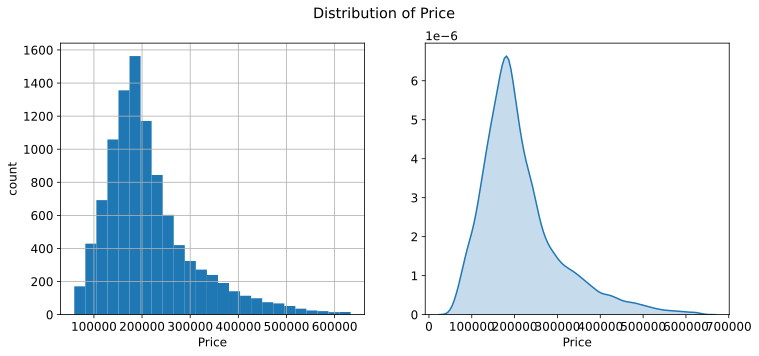

In [26]:
plt.figure(figsize = (12, 5))

plt.subplot(121)
df['Price'].hist(bins=25)
plt.ylabel('count')
plt.xlabel('Price')

plt.subplot(122)
sns.kdeplot(df['Price'], shade=True, legend=False)
plt.xlabel('Price')

plt.suptitle('Distribution of Price')
plt.show()

Строим плотность распределения со значением моды(самое часто встречающееся значение), среднего и медианы

In [27]:
target_mean = round(df['Price'].mean(), 2)
target_median = df['Price'].median()
target_mode = df['Price'].mode()[0]

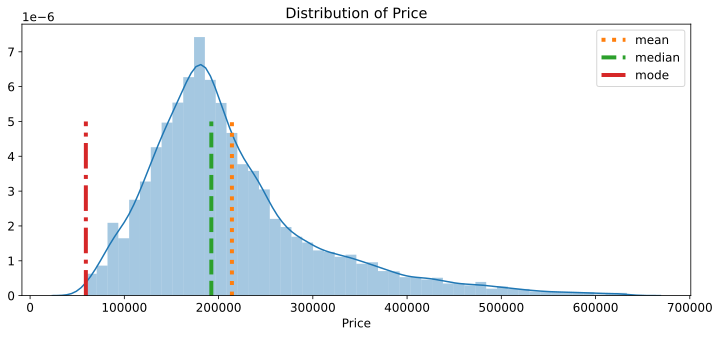

In [28]:
plt.figure(figsize = (12, 5))

sns.distplot(df['Price'])

y = np.linspace(0, 0.000005, 100)
plt.plot([target_mean] * 100, y, label='mean', linestyle=':', linewidth=4)
plt.plot([target_median] * 100, y, label='median', linestyle='--', linewidth=4)
plt.plot([target_mode] * 100, y, label='mode', linestyle='-.', linewidth=4)

plt.title('Distribution of Price')
plt.legend()
plt.show()

In [29]:
df.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Healthcare_2,Shops_1,Shops_2,Price
count,9997.000000,9997.000000,9997.000000,7885.000000,9997.000000,9997.000000,9997.000000,9.997000e+03,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,5199.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,50.401821,1.888867,56.167106,36.131513,5.842853,8.525158,12.581474,3.990762e+03,0.118853,0.009703,0.027508,24.687106,5352.169551,8.026808,1143.221389,1.319096,4.229269,0.082525,214161.934244
std,43.588632,0.821963,19.152427,18.638342,4.811016,5.239797,6.582478,2.005303e+05,0.119030,0.098029,0.163567,17.535219,4007.359551,23.798206,1021.676414,1.493620,4.803361,0.275176,92874.114626
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,20.000000,1.000000,41.773176,22.769316,1.000000,4.000000,9.000000,1.974000e+03,0.017647,0.000000,0.000000,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,0.000000,153893.979077
50%,36.000000,2.000000,52.505780,32.772431,6.000000,7.000000,13.000000,1.977000e+03,0.075424,0.000000,0.000000,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,0.000000,192302.751941
75%,75.000000,2.000000,65.890231,45.108803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,0.000000,0.000000,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,0.000000,249174.529858
max,209.000000,10.000000,275.645284,461.463614,96.000000,42.000000,48.000000,2.005201e+07,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,1.000000,633233.466570


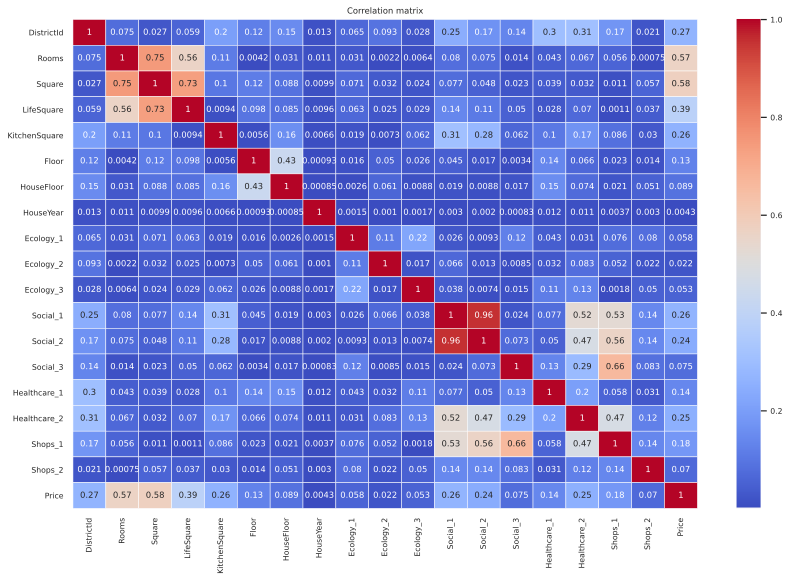

In [30]:
plt.figure(figsize = (14,9))

sns.set(font_scale=0.7)
sns.heatmap(abs(df.corr()), annot=True, linewidths=.5, cmap='coolwarm')

plt.title('Correlation matrix')
plt.show()

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9997 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     9997 non-null   int64  
 1   Rooms          9997 non-null   float64
 2   Square         9997 non-null   float64
 3   LifeSquare     7885 non-null   float64
 4   KitchenSquare  9997 non-null   float64
 5   Floor          9997 non-null   int64  
 6   HouseFloor     9997 non-null   float64
 7   HouseYear      9997 non-null   int64  
 8   Ecology_1      9997 non-null   float64
 9   Ecology_2      9997 non-null   int64  
 10  Ecology_3      9997 non-null   int64  
 11  Social_1       9997 non-null   int64  
 12  Social_2       9997 non-null   int64  
 13  Social_3       9997 non-null   int64  
 14  Healthcare_1   5199 non-null   float64
 15  Healthcare_2   9997 non-null   int64  
 16  Shops_1        9997 non-null   int64  
 17  Shops_2        9997 non-null   int64  
 18  Price   

In [32]:
df_health_notnull = df.loc[df.Healthcare_1.notnull()]

In [33]:
df_lifesq_notnull = df.loc[df.LifeSquare.notnull()]